In [2]:
import numpy as np
import cv2
from skimage import io
from matplotlib import pyplot as plt

def url_to_image(url):
    print("downloading %s" % (url))
    return cv2.cvtColor(io.imread(url), cv2.COLOR_BGR2RGB)

url = "https://raw.githubusercontent.com/mdavydov/ComputerVisionCourse/master/images/view.jpg"
img = url_to_image(url)

(r,c) = img.shape[:2]
pts1 = np.float32([[0,0],[r,0],[0,c]])
pts2 = np.float32([[50,0],[r,50],[0,c-50]])

downloading https://raw.githubusercontent.com/mdavydov/ComputerVisionCourse/master/images/view.jpg


In [8]:
matrix_A = np.zeros((6, 6))

matrix_A[:,5] = [0, 1, 0, 1, 0, 1]
matrix_A[:,4] = [1, 0, 1, 0, 1, 0]
matrix_A[:,0] = [0, 0, r, 0, 0, 0]
matrix_A[:,1] = [0, 0, 0, 0, c, 0]
matrix_A[:,2] = [0, 0, 0, r, 0, 0]
matrix_A[:,3] = [0, 0, 0, 0, 0, c]

res_matrix = np.linalg.inv(matrix_A).dot(np.array([50, 0, r, 50,0, c-50]))

result_reshaped = np.array(
    [res_matrix[0], res_matrix[1], res_matrix[4],
     res_matrix[2], res_matrix[3], res_matrix[5]
    ]).reshape(2, 3)

result_reshaped

array([[ 0.91666667, -0.08333333, 50.        ],
       [ 0.08333333,  0.91666667,  0.        ]])

In [6]:
def cv2_imshow(img):

    plt.figure(figsize=(15, 10))
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    plt.imshow(img)

[[ 0.91666667 -0.08333333 50.        ]
 [ 0.08333333  0.91666667  0.        ]]


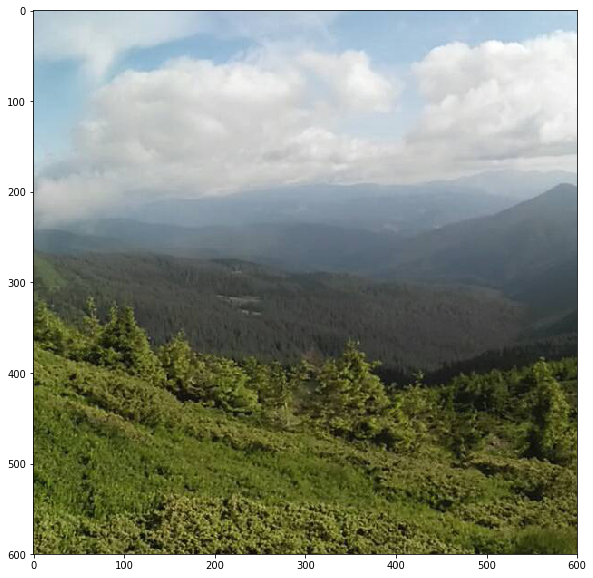

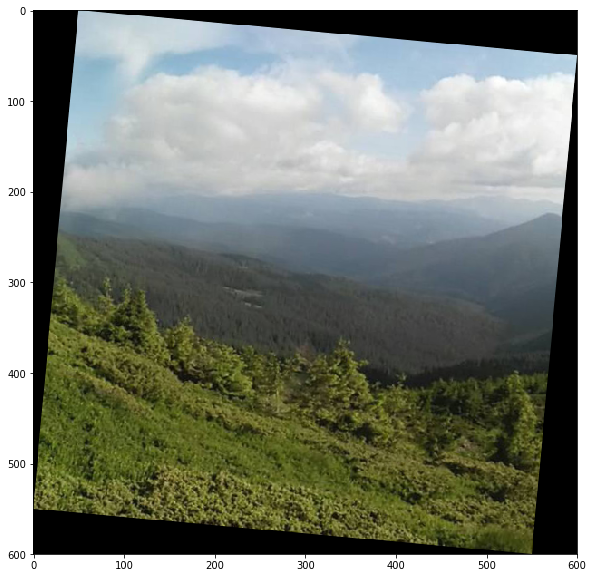

In [7]:
# implement this function
M = cv2.getAffineTransform(pts1,pts2)
print(M)

dst = cv2.warpAffine(img,M,img.shape[:2])
cv2_imshow(img)
cv2_imshow(dst)

